# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

Text(0.5, 1.0, 'Scatter Plot Retrasos vs. Edad')

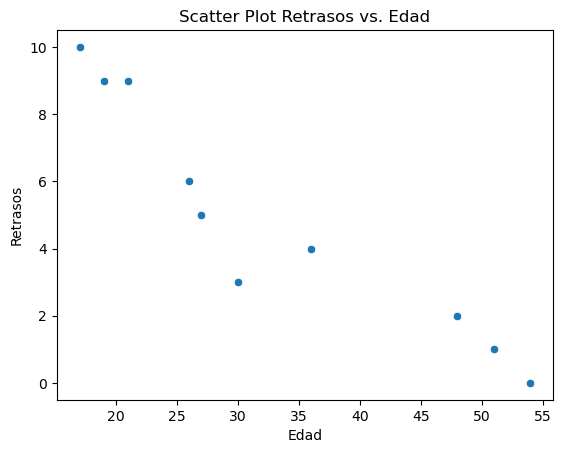

In [6]:
# Your code here
sns.scatterplot(data=student_data, x= 'Edad', y='Retrasos')
plt.title("Scatter Plot Retrasos vs. Edad")

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?
Estan inversamente relacionado, cuanto más edad menos retrados. Hay una tendencia lineal.

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [10]:
# your code here
student_data.cov()

,Edad,Retrasos
Edad,187.655556,-45.566667
Retrasos,-45.566667,12.544444


In [11]:
student_data.corr()

,Edad,Retrasos
Edad,1.000000,-0.939163
Retrasos,-0.939163,1.000000


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.


La covarianza mide cómo dos variables varían juntas, pero no está estandarizada, lo que dificulta la comparación en diferentes escenarios.
La correlación, por otro lado, estandariza esta medida, permitiendo la comparación entre diferentes pares de variables (entre -1 y 1).
Covarianza -> Valor negativo: Indica que las variables se mueven en direcciones opuestas.*
Correlación -> Valor cercano a -1: Indica una relación lineal negativa fuerte. (entre -1 y 1)*

Grafica tu modelo de regresión en tu diagrama de dispersión.

In [15]:
seed = 42

In [16]:
# Your code here.
X = student_data['Edad'].values.reshape(-1,1)
y = student_data['Retrasos'].values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8, 1) (2, 1) (8,) (2,)


In [18]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

13.46408839779005 [-0.26657459]


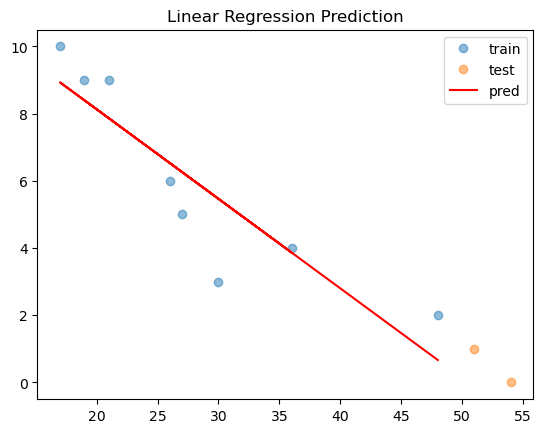

In [19]:
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5, label ='train')
plt.plot(X_test, y_test, "o", alpha=.5, label = 'test')
plt.plot(X_train, y_train_pred, "r", label='pred')
plt.title("Linear Regression Prediction")
plt.legend()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')
# Compute MSE for training and testing sets
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.8038889848066298
Test R^2 Score: -3.2925925643295164

Train MSE: 1.5688881215469614
Test MSE: 1.073148141082379


### OLS

In [22]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              8.151
Date:                Sun, 03 Nov 2024   Prob (F-statistic):                      0.0245
Time:                        20:42:02   Log-Likelihood:                         -23.400
No. Observations:                   8   AIC:                                      48.80
Df Residuals:                       7   BIC:                                      48.88
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1645      0.058      2.855      0.025       0.028       0.301
==============================================================================
Omnibus:                        0.591   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.504
Skew:                          -0.165   Prob(JB):                        0.777
Kurtosis:                       1.815   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*tu explicación aquí*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [26]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./datasets/vehicles.csv')

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [28]:
# Your code here.
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [29]:
vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Barrels/Year']]

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Barrels/Year
0,1984,4.0,19.388824,17,19.388824
1,1984,6.0,25.354615,13,25.354615
2,1985,4.0,20.600625,16,20.600625
3,1985,6.0,25.354615,13,25.354615
4,1987,6.0,20.600625,16,20.600625
...,...,...,...,...,...
35947,2013,3.0,9.155833,36,9.155833
35948,2014,3.0,9.155833,36,9.155833
35949,2015,3.0,9.155833,36,9.155833
35950,2016,3.0,9.155833,36,9.155833


In [30]:
# Your code here.
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Barrels/Year']].values
y = vehicles['CO2 Emission Grams/Mile'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 5) (7191, 5) (28761,) (7191,)


In [32]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train_df = pd.DataFrame(X_train, columns=['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'])
X_test_df = pd.DataFrame(X_test, columns=['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'])
X_train_df

(28761, 5) (7191, 5) (28761,) (7191,)


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,2005.0,4.0,16.480500,20.0,16.480500
1,1985.0,4.0,10.987000,30.0,10.987000
2,1991.0,4.0,16.480500,20.0,16.480500
3,2013.0,6.0,15.695714,21.0,15.695714
4,1987.0,8.0,21.232500,18.0,21.232500
...,...,...,...,...,...
28756,1997.0,4.0,15.695714,21.0,15.695714
28757,1993.0,6.0,20.600625,16.0,20.600625
28758,2006.0,12.0,29.964545,11.0,29.964545
28759,2013.0,4.0,13.733750,24.0,13.733750


In [33]:
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.333e+05
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:42:03   Log-Likelihood:            -1.2281e+05
No. Observations:               28761   AIC:                         2.456e+05
Df Residuals:                   28756   BIC:                         2.457e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               544.7457     22.492     24.220      0.000     500.661     588.831
Year                 -0.1975      0.011    -17.630      0.000      -0.219      -0.176
Cylinders             3.3658      0.093     36.005      0.000       3.183       3.549
Fuel Barrels/Year    10.7343      0.030    355.340      0.000      10.675      10.794
Combined MPG         -3.6017      0.048    -74.841      0.000      -3.696      -3.507
Fuel Cost/Year       10.7343      0.030    355.340      0.000      10.675      10.794
==============================================================================
Omnibus:                    63110.854   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        390501098.005
Skew:                          20.151   Prob(JB):                         0.00
Kurtosis:                     572.416   Cond. No.                     1.03e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

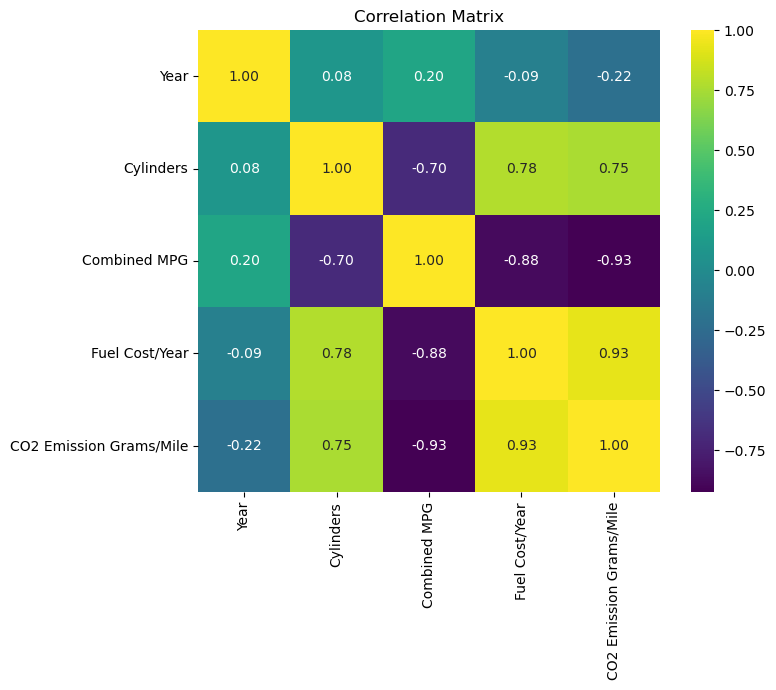

In [74]:
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = vehicles[['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [38]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [40]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [44]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*